In [ ]:
#Importing all library

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [ ]:
#install split-folders
!pip install split-folders

In [ ]:
#Downloading file and keep it in tmp folder
!wget --no-check-certificate \
  https://storage.googleapis.com/capstone-diversita/dataset-for-capstone.zip \
  -O /content/dataset-for-capstone.zip

--2021-05-31 01:50:06--  https://storage.googleapis.com/capstone-diversita/dataset-for-capstone.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198291011 (189M) [application/x-zip-compressed]
Saving to: ‘/content/dataset-for-capstone.zip’

/content/dataset-fo 100%[===================>] 189.10M  29.9MB/s    in 6.3s    

2021-05-31 01:50:14 (29.9 MB/s) - ‘/content/dataset-for-capstone.zip’ saved [198291011/198291011]



In [ ]:
# For Deleting the folder
shutil.rmtree('data/__MACOSX')

In [ ]:
#Extracting the zip file

local_zip = 'dataset-for-capstone.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
try:
  os.mkdir('data')
except OSError as error:
  pass
zip_ref.extractall('/content/data')
zip_ref.close()

In [ ]:
#Split The Folder
import splitfolders
splitfolders.ratio('/content/data', output='/content/data_splitted', seed=1337, ratio=(.9, .1))

Copying files: 2898 files [00:00, 4288.59 files/s]


In [ ]:
#Selecting which one is the train dir and validation dir
base_dir = '/content/data_splitted'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
#Training
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 10,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size = 10,
                                                              class_mode='categorical',
                                                              target_size = (150, 150))


Found 2602 images belonging to 9 classes.
Found 295 images belonging to 9 classes.


In [ ]:
### Load the weight

#Extracting the zip file first

local_zip = 'saved_model_2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
try:
  os.mkdir('saved_model_2')
except OSError as error:
  pass
zip_ref.extractall('/content/saved_model_2')
zip_ref.close()

In [ ]:
model.load_weights('saved_model_2/')

In [ ]:
history = model.fit(train_generator,
                              epochs=100,
                              verbose=1,
                              validation_data = validation_generator)


Epoch 1/100
261/261 [==============================] - 28s 105ms/step - loss: 0.0935 - acc: 0.9758 - val_loss: 0.4164 - val_acc: 0.9254
Epoch 2/100
261/261 [==============================] - 28s 105ms/step - loss: 0.0644 - acc: 0.9789 - val_loss: 0.5442 - val_acc: 0.9186
Epoch 3/100
261/261 [==============================] - 27s 105ms/step - loss: 0.1163 - acc: 0.9662 - val_loss: 0.5630 - val_acc: 0.9220
Epoch 4/100
261/261 [==============================] - 28s 106ms/step - loss: 0.1571 - acc: 0.9581 - val_loss: 0.4206 - val_acc: 0.9288
Epoch 5/100
261/261 [==============================] - 28s 105ms/step - loss: 0.1215 - acc: 0.9612 - val_loss: 0.4468 - val_acc: 0.9153
Epoch 6/100
261/261 [==============================] - 28s 108ms/step - loss: 0.1423 - acc: 0.9631 - val_loss: 0.5303 - val_acc: 0.9051
Epoch 7/100
261/261 [==============================] - 29s 112ms/step - loss: 0.0711 - acc: 0.9777 - val_loss: 0.5291 - val_acc: 0.9119
Epoch 8/100
261/261 [===========================

<Figure size 432x288 with 0 Axes>

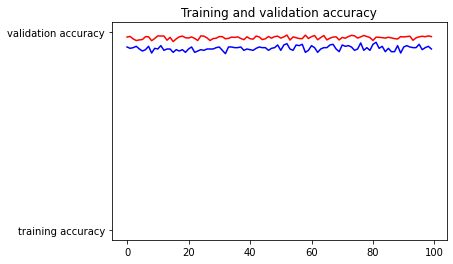

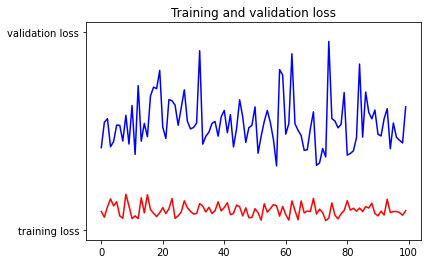

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Loss and Accuracy
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#Training and validation accuracy plot
plt.plot(epochs, acc, 'r', 'training accuracy')
plt.plot(epochs, val_acc, 'b', 'validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

#Training and validation loss
plt.plot(epochs, loss, 'r', 'training loss')
plt.plot(epochs, val_loss, 'b', 'validation loss')
plt.title("Training and validation loss")
plt.figure()

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Ini adalah Bubur Ayam


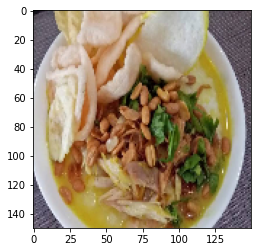

In [ ]:
#Testing the result

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#Predicting Images

img = image.load_img('data-test/buburayam.jpg', target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

idxmax = -1
maks = -1
idx = 0
for nilai in classes[0] : 
  if nilai > maks :
    maks = nilai
    idxmax = idx
  idx = idx + 1

print(classes)
if idxmax == 0 : 
  print("Ini adalah Bubur Ayam")
elif idxmax == 1 : 
  print("Ini adalah Hot Dog")
elif idxmax == 2 : 
  print("Ini adalah Mie goreng")
elif idxmax == 3 : 
  print("Ini adalah Nasi Goreng")
elif idxmax == 4 : 
  print("Ini adalah Nasi Putih")
elif idxmax == 5 : 
  print("Ini adalah Rendang")
elif idxmax == 6 : 
  print("Ini adalah Sushi")
elif idxmax == 7 : 
  print("Ini adalah Telur Ceplok")
elif idxmax == 8 : 
  print("Ini adalah Telur Dadar")

In [ ]:
# os.listdir()

In [ ]:
#Save the model weights
model.save_weights('saved_model_3/')

In [ ]:
#Save the model Architecture
model.save('saved_model_architecture/')

INFO:tensorflow:Assets written to: saved_model_architecture/assets


In [ ]:
os.listdir('saved_model')

['checkpoint', '.index', '.data-00000-of-00001']

In [ ]:
### This block of code is to make a folder into a zip file

#Making a zip file
from zipfile import ZipFile
import os
from os.path import basename
# create a ZipFile object
with ZipFile('saved_model_3.zip', 'w') as zipObj:
   # Iterate over all the files in directory
   for folderName, subfolders, filenames in os.walk('saved_model_3'):
       for filename in filenames:
           #create complete filepath of file in directory
           filePath = os.path.join(folderName, filename)
           # Add file to zip
           zipObj.write(filePath, basename(filePath))